In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


plt.rcParams["figure.figsize"] = (8,8)

## 1. Logistic Regression. Implement the Logistic Regression Model as a Python Class (Check the structure in previous assignments).

In [2]:
class LogisticRegression:
    """
    Function to compute Logistic regression given data
    
    attributes:
    self.n_steps: maximum number of iteration the fit method can do
    self.learning_rate: learning rate used in gradient descent
    self.coefficients: coefficients of the class from W1 to Wn, where n is the number of features
    self.intercept: interception of fitted model, W0
    """
    
    def __init__(self, lr = .1, max_iterations = 200):
        """
        Class initializer
        
        input:
        lr: learning rate used in gradient descent
        max_iterations: maximum number of iterations the model can do
        
        output:
        initializa the attributes of the class
        
        """
        self.n_steps = max_iterations
        self.learning_rate = lr
        self.coefficients = None
        
    
    def _format_x(self, X):
        """
        Private function to add a new column of values 1 to the matrix of the variables, the column is add in the beginning of the matrix
        
        Input:
        * X: Matrix or array containing the values of the input variable
        
        Output:
        * Return either a vector having added 1 to its first value or a Matrix having a new column of 1
        """
        X = np.array(X)
        #creating columns of
        new_column = [1 for i in range(len(X))] 
        
        #case of matrix
        try:
            return np.insert(X, 0, new_column, axis = 1)
        
        #case of a vector, so each value of the vector become a row
        except:
            
            X = np.reshape(X, (len(X),1))
            
            return np.insert(X, 0, new_column, axis = 1)
    
        
    
    def predict(self, inputs):
        """
        Function to predict the activation of the perceptron, either 1 or 0
        
        Input:
        inputs: list of values that are use for predicting
        
        Output:
        return a list of 1 or 0, belonging to the activation of each input
        """
        inputs = self._format_x(inputs)
        
        values = np.sum(inputs * self.coefficients, axis = 1)
        
        return [1 if value >= .5 else 0 for value in self.__sigmoid(values)]
    
    def probabilities(self, inputs):
        """
        Function to predict the probability for the activation
        
        Input:
        inputs: list of values that are use for predicting
        
        Output:
        return a list of probabilities
        """
        
        inputs = self._format_x(inputs)
        
        values = np.sum(inputs * self.coefficients, axis = 1)
        
        return self.__sigmoid(values)
    
    def __sigmoid(self, model):
        """
        Function to compute the sigmoid of each value of a given numpy array
        
        input:
        model: value to apply the sigmoid function
        
        output:
        return the sigmoid of a given x
        """
        
        sigmoid = 1/(1+np.exp(-model))
        
        return sigmoid
    
    def fit(self, train_inputs, train_labels):
        """
        Function to fit the logistic regression
        
        Input:
        train_inputs: row for training the model
        train_labels: target values for training the model
        
        
        Output:
        does not return nothing, but fit the model.
        """
        
        N = len(train_inputs)
        
        #initializing the coefficients to 0, it is added 1 because of the interception will be the first value of the coefficients
        try:
            self.coefficients = np.zeros(len(train_inputs[0]) + 1)
        except:
            self.coefficients = np.zeros(2)
        #adding the new column of 1 to not crash because of the interception
        train_inputs = self._format_x(train_inputs)
        
        train_labels = np.array(train_labels)
        
        
        #looping through each epoch
        for _ in range(self.n_steps):
            
            #getting the linear model, the perceptron
            linear = np.sum(train_inputs * self.coefficients, axis = 1)

            
            #getting the sigmoid value for each value of the linear model
            sigmoid_prediction = self.__sigmoid(linear)


            #getting the gradien descent
            gradient = np.dot(train_inputs.T, (sigmoid_prediction - train_labels))/N
             
            #adjusting the coefficients 
            self.coefficients -= self.learning_rate * gradient
            
            

## 2. Features Plot. Plot a scatter plot using mean texture and mean radius. Display malignant growths in red and benign growths in blue.

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer_df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_df['cancer_type'] = cancer['target']

In [6]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


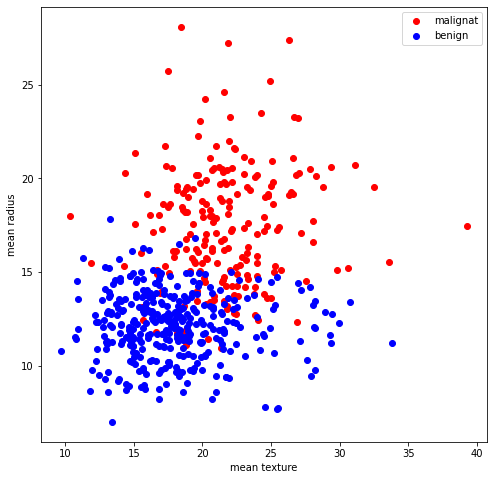

In [7]:
plt.scatter(x = cancer_df.loc[cancer_df.cancer_type == 0]['mean texture'], 
                y = cancer_df.loc[cancer_df.cancer_type == 0]['mean radius'], label = 'malignat', color = 'r')
plt.scatter(x = cancer_df.loc[cancer_df.cancer_type == 1]['mean texture'], 
                y = cancer_df.loc[cancer_df.cancer_type == 1]['mean radius'], label = 'benign', color = 'b')
plt.legend()
plt.xlabel("mean texture")
plt.ylabel("mean radius")
plt.title("Type cancer according to mean texture and mean radius")
plt.title("")
plt.show()

## 3. Logistic Regression Prediction using one feature. Predict if a tumor is cancerous by only using the first feature of the dataset: mean radius

### (a) Make a scatter plot of the class (malignant/benign) as a function of the mean radius

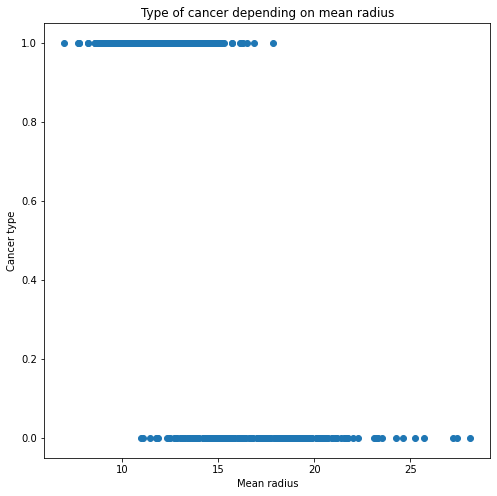

In [8]:
plt.scatter(x = cancer_df['mean radius'], y = cancer_df['cancer_type'])
plt.title("Type of cancer depending on mean radius")
plt.xlabel("Mean radius")
plt.ylabel("Cancer type")
plt.show()

### (b) Use the LogisticRegression class to train a Logistic Regression model

In [9]:
data_train, data_test, target_train, target_test = train_test_split(cancer_df['mean radius'],
                                                                    cancer_df['cancer_type'], train_size = .75, 
                                                                    stratify = cancer_df['cancer_type'], random_state = 0)

In [10]:
logistic_regression = LogisticRegression( max_iterations = 1000)

In [11]:
logistic_regression.fit(data_train, target_train)

### (c) Print the intercept (𝜔0) and coefficient (𝜔1) 

In [12]:
print("interception w0: ",logistic_regression.coefficients[0])
print("coefficient w1: ",logistic_regression.coefficients[1])

interception w0:  8.055092390056064
coefficient w1:  -0.8482607223445255


### (d) Plot the fitted sigmoid curve and the original data

In [13]:
def sigmoid(values):
    sigmoid = 1/(1+np.exp(-values))
    
    return sigmoid

In [14]:
x_axis = np.linspace(0, 30, 100)
y_axis = logistic_regression.probabilities(x_axis)

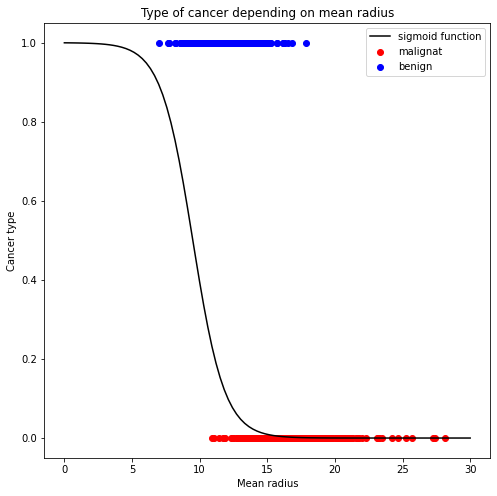

In [15]:
plt.plot(x_axis, y_axis, label = 'sigmoid function', color = 'black')
plt.scatter(x = cancer_df.loc[cancer_df.cancer_type == 0]['mean radius'],
            y = cancer_df.loc[cancer_df.cancer_type == 0]['cancer_type'], label = 'malignat', color = 'r')
plt.scatter(x = cancer_df.loc[cancer_df.cancer_type == 1]['mean radius'],
            y = cancer_df.loc[cancer_df.cancer_type == 1]['cancer_type'], label = 'benign', color = 'b')
plt.title("Type of cancer depending on mean radius")
plt.xlabel("Mean radius")
plt.ylabel("Cancer type")
plt.legend()
plt.show()

### (e) Predict the result if the mean radius is 8 and 20

In [16]:
value = [8]
print("mean radius: ", value[0])
print("probability to belong bening: ", logistic_regression.probabilities(value)[0])
print("probability to belong malignant: ", 1 - logistic_regression.probabilities(value)[0])
print("predict class: ", "bening" if logistic_regression.predict(value)[0] == 1 else "malignant")

mean radius:  8
probability to belong bening:  0.7805726487237372
probability to belong malignant:  0.21942735127626278
predict class:  bening


In [17]:
value = [20]
print("mean radius: ", value[0])
print("probability to belong bening: ", logistic_regression.probabilities(value)[0])
print("probability to belong malignant: ", 1 - logistic_regression.probabilities(value)[0])
print("predict class: ", "bening" if logistic_regression.predict(value)[0] == 1 else "malignant")

mean radius:  20
probability to belong bening:  0.00013499712675155807
probability to belong malignant:  0.9998650028732484
predict class:  malignant


## 4. Logistic Regression Prediction using all features.

### (a) Split the dataset into 75% training and 25% testing set. Don’t forget to use the stratify parameter in the train_test_split function to specify which column to use so that the split is proportionate

#### References:
* https://www.researchgate.net/publication/330903934_Using_Feature_Selection_Techniques_to_Improve_the_Accuracy_of_Breast_Cancer_Classification_Special_Issue_on_Data_and_Security_Engineering

* https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/#:~:text=Random%20Forests%20are%20often%20used,trees%20(called%20gini%20impurity)

In [18]:
X = cancer.data

Y = cancer.target

feat_labels = cancer["feature_names"]

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [20]:
# Split the data into 30% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0, stratify = Y)

In [21]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('mean radius', 0.03836660647859019)
('mean texture', 0.014279734589389597)
('mean perimeter', 0.04994520089546741)
('mean area', 0.04347841388867186)
('mean smoothness', 0.004797904908833263)
('mean compactness', 0.010898974670599007)
('mean concavity', 0.05567860512858598)
('mean concave points', 0.10755796011352367)
('mean symmetry', 0.0034325701990947657)
('mean fractal dimension', 0.0032105583732346234)
('radius error', 0.01403675565578545)
('texture error', 0.004593175020380768)
('perimeter error', 0.01243627255092705)
('area error', 0.031567652192931485)
('smoothness error', 0.0033752074581847075)
('compactness error', 0.0038563387975429726)
('concavity error', 0.005602577764511326)
('concave points error', 0.004701013750797065)
('symmetry error', 0.0030981664733265657)
('fractal dimension error', 0.002921292280830279)
('worst radius', 0.11431290704159398)
('worst texture', 0.016919179278975415)
('worst perimeter', 0.13446300458651403)
('worst area', 0.11081826176636358)
('worst

In [22]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)


# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

mean radius
mean perimeter
mean area
mean concavity
mean concave points
area error
worst radius
worst perimeter
worst area
worst concavity
worst concave points


In [23]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [24]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [25]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (30 Features) Model
AllFeatures = accuracy_score(y_test, y_pred)
print(AllFeatures)

0.9440559440559441


In [26]:
X_important_test.shape

(143, 11)

In [27]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (11 Features) Model
LimitFeatures = accuracy_score(y_test, y_important_pred)
print(LimitFeatures)

0.9370629370629371


In [28]:
#Diferecences 

print(AllFeatures-LimitFeatures)

0.006993006993006978


If we comparate the accuracy of all features with the limite features we could see that only loss 0.02 of acurracy, this cost is so small if we comparate the number of features in the model 30 original features vs 11 selected features. 

In [29]:
logistic_regression_f = LogisticRegression( max_iterations = 1000)

In [30]:
logistic_regression_f.fit(X_important_train, y_train)

### (b) Print the intercept and coefficients of the features.

In [31]:
print("Intercept: ", logistic_regression_f.coefficients[0])

Intercept:  0.4980965910268875


In [32]:
for feature, coef in zip(sfm.get_support(indices=True), logistic_regression_f.coefficients[1:]):
    print("Feature {}: {}".format(feat_labels[feature], coef))

Feature mean radius: -0.28197279572607475
Feature mean perimeter: -0.2750982486629446
Feature mean area: -0.35055940041323247
Feature mean concavity: -0.4705587708036509
Feature mean concave points: -0.9341021342888939
Feature area error: -0.8330662714416529
Feature worst radius: -1.1427522062895656
Feature worst perimeter: -1.0029795178427994
Feature worst area: -1.0372840436637998
Feature worst concavity: -0.6144621768244449
Feature worst concave points: -1.4390856256544087


## 5. Testing the Model.

### (a) Predict the observations in the test set. Print the results of the predictions and original diagnosis side-by-side for an easy comparison

In [33]:
y_predicted = logistic_regression_f.predict(X_important_test)

In [34]:
for predict, original in zip(y_predicted, y_test):
    print("Predicted: {} --- Original: {}".format(predict, original))

Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 0
Predicted: 0 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 0 --- Original: 0
Predicted: 0 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 1 --- Original: 1
Predicted: 1 -

### (b) The confusion matrix shows the number of actual and predicted labels and how many of them are classified correctly. Print the Confusion Matrix:

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[49,  4],
       [ 5, 85]], dtype=int64)

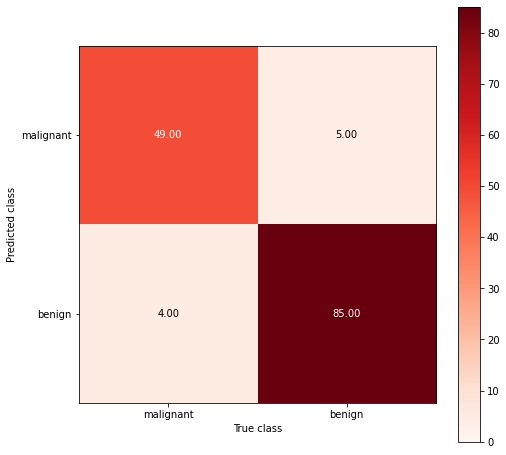

In [36]:
# After obtaining the `confusion_matrix` in the las cell
# execute this cell to print it into a graphical way.

corr_im = plt.imshow(confusion_matrix, cmap="Reds", vmin=0)
corr_cbar = plt.colorbar(corr_im)

corr_array = corr_im.get_array()
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        cell_value = corr_array[i][j]
        if cell_value > 0.5*np.max(confusion_matrix):
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(i, j, '{:.2f}'.format(cell_value), color=text_color, ha='center', va='center')

plt.xticks(ticks=range(len(cancer.target_names)), labels=cancer.target_names)
plt.yticks(ticks=range(len(cancer.target_names)), labels=cancer.target_names)

plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.show()

### (c) Based on the confusion matrix, calculate the following metrics:

In [37]:
tn, fp, fn, tp = confusion_matrix.ravel()

#### Accuracy: It is defined as the sum of all correct predictions divided by the total number of predictions:

In [38]:
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Accuracy: ",accuracy)

Accuracy:  0.9370629370629371


#### Recall (True Positive Rate TPR): It is defined to be,

In [39]:
recall = (tp)/(tp + fn)
print("Recall: ",recall)

Recall:  0.9444444444444444


#### False Positive Rate (FPR). It is defined to be

In [40]:
fpr = (fp)/( tn + fp )
print("FPR: ",fpr)

FPR:  0.07547169811320754


#### F1 Score. It is defined to be:

In [41]:
precision = tp/(fp+tp)
f1 = 2 * ((precision*recall)/(precision+recall))
print("F1: ",f1)

F1:  0.9497206703910613


#### (d) If a malignant tumor is represented as negative and benign tumor is represented as positive, what does it mean if:

- The precision or recall is high:
It means that there weren't many False Positives or False Negatives, because the denominator amount is almost the same as the nominator, which is the amount of true positives we would have. This means, that tumors are being located correctly. 

- The precision is low:
If the precision is low, it would mean that we have a large case of false positives, thus the tumors are being falsely flagged as beningn. 

- The recall is low:
If the recall is low, it would mean that we have a large case of false negatives, thus the tumors are being falsely flagged as malignant.

#### (e) Use the score() function of the model to get the accuracy and use the classification_report() to get the precision, recall and F1-score.

In [42]:
accuracy_score(y_test, y_predicted)

0.9370629370629371

In [43]:
print(metrics.classification_report(y_test, y_predicted, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.92      0.92        53
      benign       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [44]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



## 6. ROC curve. The Receiver Operating Characteristic (ROC) curve is an alternative to examine the effectiveness of an algorithm. The ROC curve is created by plotting the TPR against the FPR at various threshold settings.

## (a) Find the value of the FPR and TPR at different values of the threshold (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9) 

In [45]:
y_probs = logistic_regression_f.probabilities(X_important_test)

In [46]:
thresholds = np.linspace(0.1,.9,9)

TPR_L = []

FPR_L = []

for tresh in thresholds:

    y_predicted = [1 if value >= tresh else 0 for value in y_probs]

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    
    tpr = tp/(tp+fn)
    
    TPR_L.append(tpr)
    
    fpr = fp/(fp+tn)
    
    FPR_L.append(fpr)
    
    

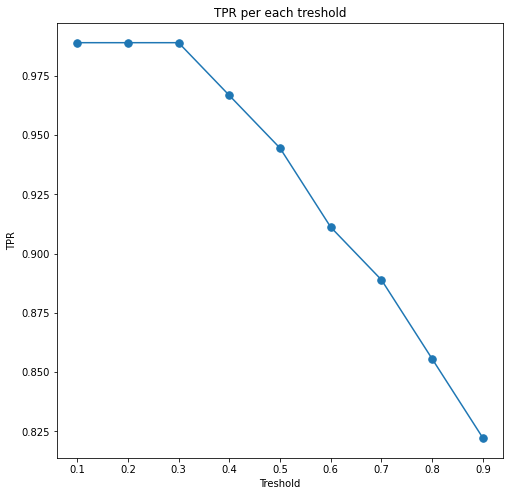

In [47]:
plt.plot(thresholds, TPR_L,'.', markersize = 15, linestyle = '-')
plt.title("TPR per each treshold")
plt.xlabel("Treshold")
plt.ylabel("TPR")
plt.show()

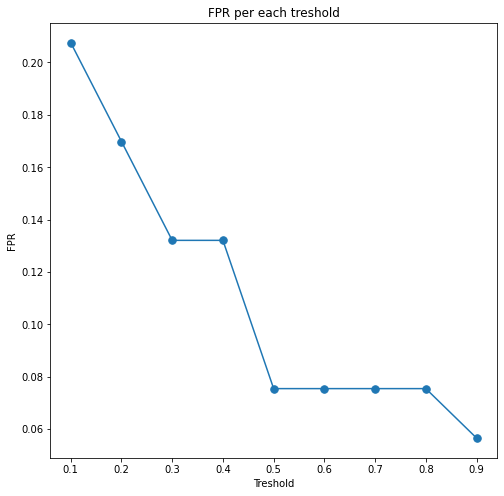

In [48]:
plt.plot(thresholds, FPR_L,'.', markersize = 15, linestyle = '-')
plt.title("FPR per each treshold")
plt.xlabel("Treshold")
plt.ylabel("FPR")
plt.show()

## (b) What are the values of the TPR and FPR with threshold of value 0 and 1? 

In [49]:
for tresh in [0,1]:

    y_predicted = [1 if value >= tresh else 0 for value in y_probs]

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()  
    
    tpr = tp/(tp+fn)
    
    fpr = fp/(fp+tn)
     
    print("value {} -- TPR: {} -- FPR: {}".format(tresh, tpr,fpr))
    print(metrics.confusion_matrix(y_test, y_predicted), "\n")

value 0 -- TPR: 1.0 -- FPR: 1.0
[[ 0 53]
 [ 0 90]] 

value 1 -- TPR: 0.0 -- FPR: 0.0
[[53  0]
 [90  0]] 



## (c) Make a scatter plot of the FPR and TPR 

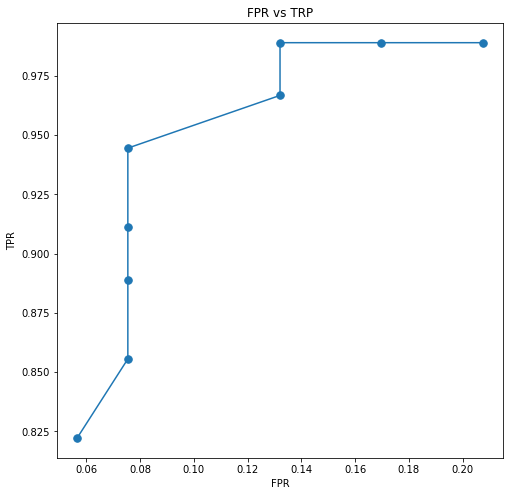

In [50]:
plt.plot(FPR_L, TPR_L, '.', markersize = 15, linestyle = '-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR vs TRP")
plt.show()

## (d) Use the roc_curve() function to plot the ROC curve and compute the Area Under the Curve (AUC).

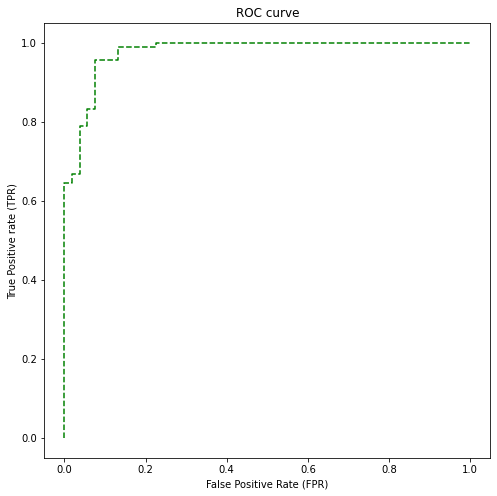

In [51]:
fpr1, tpr1, thresh = metrics.roc_curve(y_test, y_probs)

plt.plot(fpr1, tpr1, linestyle='--',color='green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.show();

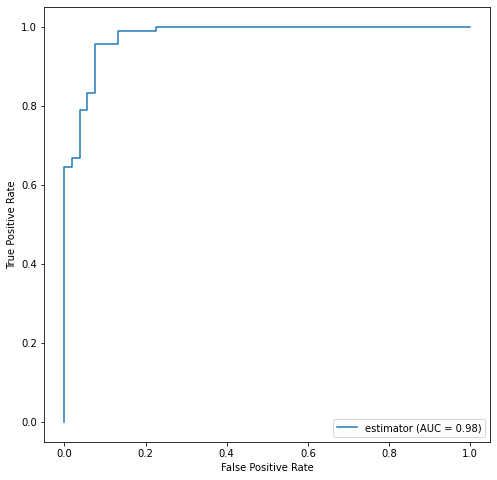

In [52]:
fpr1, tpr1, thresh = metrics.roc_curve(y_test, y_probs)
roc_auc = metrics.auc(fpr1, tpr1)
display = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc, estimator_name='estimator')
display.plot()  
plt.show()

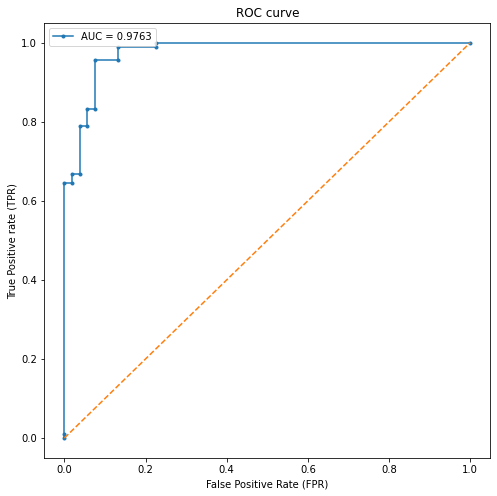

In [54]:
roc_auc = metrics.auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, marker='.', label="AUC = {}".format(round(roc_auc, 4)))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend()
plt.show();